# Understanding the Titanic Survival

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" />
 
Wellcome to the Titanic, the largest British ship at the time,  that sank in the North 
Atlantic Ocean in the early hours of 15 April 1912. 
 
In this notebook we will try to undestand the characteristics of the individuals that were at the Titanic, how many survived and who survived.

Please download the titanic.csv file from the Google Drive into your computer and load it
using Pandas.

This dataset is a partial dataset used as the training set on Kaggle's Titanic challenge.

###  NOTE: Open this notebook in Jupiter and make a copy of it (File ->  Make a copy). Work on the copied notebook so you can use the original notebook as a reference for the expected results.
 
I recommend you to try to repeat the same analysis we make here using R :-)
 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
### change this to the path you downloded the file
path = "../data/titanic.csv"

In [5]:
### user pandas to read the csv (read_csv())
### show the top rows

titanic = pd.read_csv(path)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Columns
 
Those the descriptions of the variables in this dataset:

<table>
    <tr><th> PassengerId </th><td> type should be integers </td></tr>
    <tr><th> Survived </th><td> Survived or Not </td></tr>
    <tr><th> Pclass </th><td> Class of Travel </td></tr>
    <tr><th> Name </th><td> Name of Passenger </td></tr>
    <tr><th> Sex </th><td> Gender </td></tr>
    <tr><th> Age </th><td> </td></tr>
    <tr><th> SibSp </th><td> Number of Sibling/Spouse abord </td></tr>
    <tr><th> Parch </th><td> Number of Parent/Child abord </td></tr>
    <tr><th> Ticket </th><td> </td></tr>
    <tr><th> Fare </th><td> </td></tr>
    <tr><th> Cabin </th><td> </td></tr>
    <tr><th> Embarked </th><td> The port in which a passenger has embarked. <br> C - Cherbourg, S - Southampton, Q = Queenstown </td></tr>
</table>


#### Passangers and Survival
 
First, lets check how many passangers are on the Titanic's dataset and how many of them survived?

In [15]:
passangers = len(titanic)
survived = sum(titanic[titanic.Survived>0]['Survived'])

print("We have %d passangers but only %d of them survived (%f%%)" % (passangers, survived, (survived/passangers*100)))



We have 891 passangers but only 342 of them survived (38.383838%)


Answer: We have 891 passangers but only 342 of them survived (38.383838%)

#### Missing values
 
How many missing values are in the dataset?

In [30]:
### use the function isnull() and the function sum()
# for col in titanic.columns:
#     print ("col " + col + " "+ str(sum(titanic[col].isnull())))
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Answer: The only variables having missing values are: Age (177), Cabin (687) and Emberked (2)

#### Gender distribution and survival

How distributed the survivors by gender?

In [42]:
## use groupby() and agg() to get the table bellow
titanic.groupby('Sex').agg({'Survived':['count',sum,'mean']})

Survived               
          count  sum      mean
Sex                           
female      314  233  0.742038
male        577  109  0.188908

Survived

Sex		count	sum	mean
female	  314	233	0.742038
male	  577	109	0.188908



#### Age distribution and survival

Plot the Age frequencies of the passangers. (use an histogram)


In [216]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

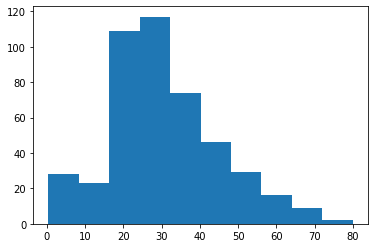

In [59]:
### As there are null values in Age, we have to drop those nulls adding the .dropna() function !
fig, ax = plt.subplots()
ax.hist(x=titanic[titanic['Sex']=='male']['Age'].dropna())
plt.show()

(0.0, 100.0)

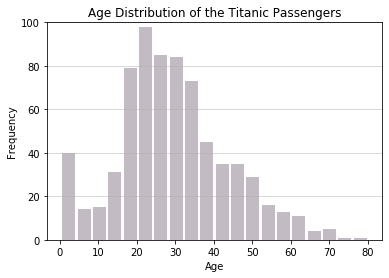

In [78]:
### A more sophisticated example...
n, bins, patches = plt.hist(x=titanic['Age'].dropna(), bins='auto', color='#AA9Faa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of the Titanic Passengers')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

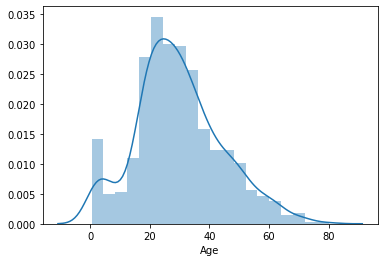

In [63]:
### using seaborn... easier to create...
sns.distplot(titanic.Age.dropna())


Create a new variable that will divide the passangers in four age categories:

- Babies: 0-5
- Children: 6-12 years old
- Young: 13-17 years old
- Adult: 18-59 years old
- Older: 60+ years old

How many (number and percent) survived on each age group? (We will use the mean function as the percentage)


In [6]:
### create the categorical variables
titanic['AgeGroup'] = '18-59'
titanic.loc[(titanic['Age']<6) & (titanic['Age']>=0),['AgeGroup']]='0-5'
titanic.loc[(titanic['Age']<13) & (titanic['Age']>=6),['AgeGroup']]='6-12'
titanic.loc[(titanic['Age']<18) & (titanic['Age']>=13),['AgeGroup']]='13-17'
titanic.loc[(titanic['Age']>=60),['AgeGroup']]='60+'
titanic.loc[(titanic['Age'].isnull()),['AgeGroup']]='No Age'
print (titanic)
# ... your code


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [147]:
## use groupby() and agg() to get the table bellow
titanic.groupby('AgeGroup').agg({'Survived':['count',sum,'mean']})

Survived               
            count  sum      mean
AgeGroup                        
0-5            44   31  0.704545
13-17          44   21  0.477273
18-59         575  222  0.386087
6-12           25    9  0.360000
60+            26    7  0.269231
No Age        177   52  0.293785

	Survived

AgeGroup count	sum	mean			
0-5	      44	31	0.704545
6-12	  25	9	0.360000
13-17	  44	21	0.477273
18-59	  752	274	0.364362
60+	      26	7	0.269231

#### Age-Gender Survival

Where there differences on survival by age group and gender?

In [148]:
## use groupby() and agg() to get the table bellow
titanic.groupby(['Sex','AgeGroup']).agg({'Survived':['count',sum,'mean']})

Survived               
                   count  sum      mean
Sex    AgeGroup                        
female 0-5            21   16  0.761905
       13-17          23   19  0.826087
       18-59         202  155  0.767327
       6-12           11    3  0.272727
       60+             4    4  1.000000
       No Age         53   36  0.679245
male   0-5            23   15  0.652174
       13-17          21    2  0.095238
       18-59         373   67  0.179625
       6-12           14    6  0.428571
       60+            22    3  0.136364
       No Age        124   16  0.129032

Survived

Sex	  AgeGroup count	sum	mean		
female	0-5	    21	    16	0.761905
        6-12	11	    3	0.272727
        13-17	23	    19	0.826087
        18-59	255	    191	0.749020
        60+	    4	    4	1.000000
male	0-5	    23	    15	0.652174
        6-12	14	    6	0.428571
        13-17	21	    2	0.095238
        18-59	497	    83	0.167002
        60+	    22	    3	0.136364

#### Passenger Class and Survival

Was there any difference in the survival among passangers by their ticket class (Pclass) ?

In [224]:
## use groupby() and agg() to get the table bellow
titanic.groupby(...).agg(...)

Survived               
          count  sum      mean
Pclass                        
1           216  136  0.629630
2           184   87  0.472826
3           491  119  0.242363

Survived

Pclass	count	sum	mean		
    1	216	    136	0.629630
    2	184	    87	0.472826
    3	491	    119	0.242363


#### Traveling alone vs with family

Who survived more, individuals that traveled alone or those who traveled with their families?

In [225]:
# first we have to determine who was alone and who was in family. Use the variables SibSp and Parch
titanic['TravelAlone'] = 0
...


## then use groupby() and agg() to get the table bellow
titanic.groupby(...).agg(...)

Survived               
               count  sum      mean
TravelAlone                        
0                354  179  0.505650
1                537  163  0.303538

Survived

TravelAlone	count	sum	mean		
    0	     354	179	0.505650
    1	     537	163	0.303538

#### Embarking port and survival

Was there any difference in survival related to the embarking port?

In [226]:
## use groupby() and agg() to get the table bellow
titanic.groupby(...).agg(...)

Survived               
            count  sum      mean
Embarked                        
C             168   93  0.553571
Q              77   30  0.389610
S             644  217  0.336957

Survived

Embarked  count	sum	mean			
    C	   168	93	0.553571
    Q	    77	30	0.389610
    S	   644	217	0.336957

#### Paid fair and survival

What was the fare range paid by the passangers?


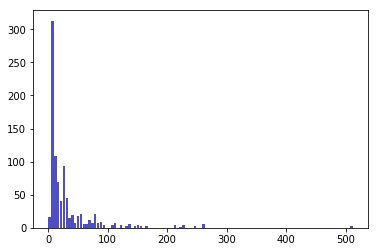

In [227]:
#### use describe() to get the summary of the Fare variable
...

### draw an histogram for the Fare variable. 



How many individuals didn't paid for their ticket?
 
Does this affected their survival?

In [228]:
### get the number of those with a Fare == 0
...

15


In [229]:
### Create a new variable called Gratis and give 1 to passangers who didn't pay
titanic['Gratis'] = 0
....

## then use groupby() and agg() to get the table bellow
...

Survived               
          count  sum      mean
Gratis                        
0           876  341  0.389269
1            15    1  0.066667

Where there differences in fare rates among the same ticket classes? 
 
If the answer was yes, does those differences affected the survival of individuals?

In [9]:
byPclass = titanic.groupby('Pclass')
byPclass['Fare'].describe()


,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [19]:
### We will use the data on the desctiptive table to divide the paid fare:
### Those who paid more than the 75% where considered 'Overpaid', 
### If paid less than the 25% where categorized as 'Underpaid', else 'Normal' fare
titanic['FareGroup'] = 'Normal'
titanic.loc[(titanic['Pclass']==1) & (titanic['Fare']<30.92395),'FareGroup'] = "Underpaid"
titanic.loc[(titanic['Pclass']==1) & (titanic['Fare']>93.5),'FareGroup'] = "Overpaid"
titanic.loc[(titanic['Pclass']==2) & (titanic['Fare']<13),'FareGroup'] = "Underpaid"
titanic.loc[(titanic['Pclass']==2) & (titanic['Fare']>26),'FareGroup'] = "Overpaid"
titanic.loc[(titanic['Pclass']==3) & (titanic['Fare']<7.75),'FareGroup'] = "Underpaid"
titanic.loc[(titanic['Pclass']==3) & (titanic['Fare']>15.5),'FareGroup'] = "Overpaid"

titanic.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-59,Underpaid
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,18-59,Normal
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18-59,Normal
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,18-59,Normal
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,18-59,Normal
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,No Age,Normal
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,18-59,Normal
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0-5,Overpaid
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,18-59,Normal
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,13-17,Overpaid


Now we will check how many survived by Pclass and Fategroup:

In [21]:
## use groupby() and agg() to get the table bellow
titanic.groupby(["Pclass","FareGroup"]).agg({"Survived":{'count',sum,'mean'}})

Survived          
                      mean count sum
Pclass FareGroup                    
1      Normal     0.660550   109  72
       Overpaid   0.735849    53  39
       Underpaid  0.462963    54  25
2      Normal     0.495146   103  51
       Overpaid   0.589744    39  23
       Underpaid  0.309524    42  13
3      Normal     0.245487   277  68
       Overpaid   0.283333   120  34
       Underpaid  0.180851    94  17

Survived

Pclass	FareGroup count	sum	mean
    1	Normal	   109	72	0.660550
        Overpaid	53	39	0.735849
        Underpaid	54	25	0.462963
    2	Normal	   103	51	0.495146
        Overpaid	39	23	0.589744
        Underpaid	42	13	0.309524
    3	Normal	   277	68	0.245487
        Overpaid   120	34	0.283333
        Underpaid	94	17	0.180851

#### The title passanger had and survival 

Which were the five most common titles passanger had? (Sir, Mr, Mrs, etc)?
 
For this part we will take the 'Name' column and will split all the words in the name by the white space.
 
Then we will join all the words and calculate the frequency of appearance of each world in descending order.
 
We will take the five most common words (must be titles), and with them we will create a new column. Then we will procede as we did in the other analyses.


In [233]:
## Join all the words in the 'Name' column
words = ' '.join(titanic['Name'])
len(words)
print(words[0:100])

Braund, Mr. Owen Harris Cumings, Mrs. John Bradley (Florence Briggs Thayer) Heikkinen, Miss. Laina F


In [234]:
## the following code will delete the punctuation
import string

table = str.maketrans({key: None for key in string.punctuation})
words = words.translate(table)
print(words[0:100])

Braund Mr Owen Harris Cumings Mrs John Bradley Florence Briggs Thayer Heikkinen Miss Laina Futrelle 


In [235]:
## now we will split by the white spaces the words string into a list
wordlist = words.split()
print(type(wordlist))
print(wordlist[1:10])

<class 'list'>
['Mr', 'Owen', 'Harris', 'Cumings', 'Mrs', 'John', 'Bradley', 'Florence', 'Briggs']


In [236]:
## We will count each unique word and show the top 20 in descending order
## There are lots of ways to this. We will generate a dictionary to make the counts

worddict = {x:wordlist.count(x) for x in wordlist}

wordunq, wordcnt = worddict.keys(), worddict.values()

print(len(worddict))
print(len(wordunq))
print(len(wordcnt))

#wordunq.tolist()

print(type(wordunq))
print(type(wordcnt))


1526
1526
1526
<class 'dict_keys'>
<class 'dict_values'>


In [243]:
## now we tranform the keys and values into lists and create with them a DataFrame

...

...


,quantity,word
1225,521,Mr
389,182,Miss
893,129,Mrs
453,64,William
124,44,John
509,40,Master
998,35,Henry
423,24,George
1356,24,James
821,23,Charles


Answer:
    quantity	word
 	521	        Mr
	182	        Miss
	129	        Mrs
	64	        William
	44	        John
	40	        Master

We have shown here that the most common titles were Mr (521), Miss (182), Mrs (129) and Master (40). 
 
This totals 872 out of 891 passengers (97.9%).
 
Now we will create a new variable with those titles and check for differences on survival among them.
 
We can use the following function to decide if a title is present on a name:

<code> 
 titanic['Name'].str.contains('Mr')
</code>

In [242]:
titanic['Title'] = 'Other'

...

## then use groupby() and agg() to get the table bellow
...


Survived               
          count  sum      mean
Title                         
Master       40   23  0.575000
Miss        180  126  0.700000
Mr          518   82  0.158301
Mrs         130  103  0.792308
Other        24    9  0.375000

Survived

Title	count	sum	mean		
Master	  40	23	0.575000
Miss	 180	126	0.700000
Mr	     518	82	0.158301
Mrs	     130	103	0.792308
Other	  24	9	0.375000